In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

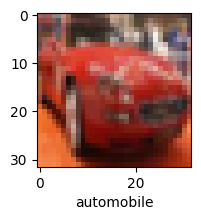

In [10]:
plot_sample(X_train, y_train, 5)

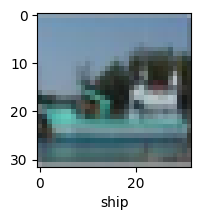

In [11]:
plot_sample(X_train, y_train, 111)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(3000, activation='relu'),
        layers.Dense(15, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8263 - accuracy: 0.3517
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.6303 - accuracy: 0.4254
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5452 - accuracy: 0.4556
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4855 - accuracy: 0.4769
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4338 - accuracy: 0.4948
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3912 - accuracy: 0.5122
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3504 - accuracy: 0.5268
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3149 - accuracy: 0.5385
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2829 - accuracy: 0.5512
Epoch 10/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.

In [13]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

In [28]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [29]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3982 - accuracy: 0.4985
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0538 - accuracy: 0.6318
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9308 - accuracy: 0.6763
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8299 - accuracy: 0.7120
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7499 - accuracy: 0.7401
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6682 - accuracy: 0.7683
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5976 - accuracy: 0.7919
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5329 - accuracy: 0.8144
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4697 - accuracy: 0.8342
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.411

In [33]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9797 - accuracy: 0.7050


[0.9797311425209045, 0.7049999833106995]

In [34]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.5083258e-06, 3.9714766e-07, 1.6568143e-04, 9.6769887e-01,
        3.8775983e-05, 3.0894818e-02, 1.1950562e-03, 1.4494731e-06,
        1.4724029e-06, 6.6772889e-09],
       [3.2788419e-05, 6.5315387e-04, 2.1490511e-08, 2.1355362e-10,
        1.7698275e-10, 1.7039865e-12, 3.4227688e-12, 4.4236676e-12,
        9.9929309e-01, 2.0980046e-05],
       [7.4529387e-03, 8.0168471e-02, 3.8855331e-05, 7.0939233e-05,
        5.3420277e-05, 1.3420413e-05, 1.9246765e-05, 1.6335716e-05,
        8.9880228e-01, 1.3364090e-02],
       [8.4766078e-01, 2.1539712e-05, 9.8568329e-04, 3.6732981e-04,
        2.0075976e-03, 2.9414075e-05, 6.8510207e-07, 8.4141746e-08,
        1.4886443e-01, 6.2467305e-05],
       [5.4202585e-09, 6.3075015e-05, 3.8553311e-03, 3.3095723e-03,
        8.6766636e-01, 6.3279993e-05, 1.2503847e-01, 1.3883990e-06,
        2.5151114e-06, 7.5301374e-09]], dtype=float32)

In [35]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [36]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

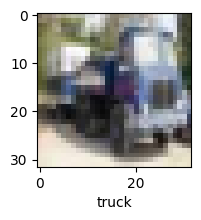

In [45]:
plot_sample(X_test, y_test,28)

In [46]:
classes[y_classes[28]]

'truck'